In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [2]:
free_session_info=pd.read_csv('free_session_info.csv')

In [3]:
free_session_info.head()

,Time Stamp,Name of the candidate,Contact,Email id,College name,Brach,People having laptop,Souce of communication,Unnamed: 8,Unnamed: 9,Country
0,8/24/2020 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,NaN,NaN,Bangladesh
1,8/24/2020 10:08:54,Abdullah,NaN,sharif3abdullah@gmail.com,IIT,Engineering,NaN,NaN,NaN,NaN,Bangladesh
2,8/24/2020 9:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,NaN,NaN,NaN,Bangladesh
3,7/28/2020 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,4.0,NaN,India
4,7/10/2020 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,NaN,2.0,NaN,India


In [4]:
free_session_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time Stamp               948 non-null    object 
 1   Name of the candidate    947 non-null    object 
 2   Contact                  909 non-null    object 
 3   Email id                 946 non-null    object 
 4   College name             940 non-null    object 
 5   Brach                    933 non-null    object 
 6   People having laptop     940 non-null    object 
 7   Souce of communication   432 non-null    object 
 8   Unnamed: 8               318 non-null    float64
 9   Unnamed: 9               0 non-null      float64
 10  Country                  476 non-null    object 
dtypes: float64(2), object(9)
memory usage: 49.2+ KB


In [5]:
free_session_info=free_session_info.drop(columns=['Unnamed: 8','Unnamed: 9'])

In [6]:
free_session_info.columns=['Time stamp','Name','Contact','Email','Collage Name','Branch','Have laptop','Communication source','Country']


In [7]:
free_session_info['Time stamp'] = pd.to_datetime(free_session_info['Time stamp'],errors='coerce')


In [8]:
free_session_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Time stamp            946 non-null    datetime64[ns]
 1   Name                  947 non-null    object        
 2   Contact               909 non-null    object        
 3   Email                 946 non-null    object        
 4   Collage Name          940 non-null    object        
 5   Branch                933 non-null    object        
 6   Have laptop           940 non-null    object        
 7   Communication source  432 non-null    object        
 8   Country               476 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 37.9+ KB


In [9]:
free_session_info.replace({'?':np.nan,'--':np.nan,'-':np.nan},inplace=True)

In [10]:
free_session_info.isna().sum()

Time stamp               22
Name                     21
Contact                  59
Email                    22
Collage Name             28
Branch                   35
Have laptop              28
Communication source    536
Country                 492
dtype: int64

In [11]:

free_session_info.Country=np.where(len(free_session_info.Contact)>10,free_session_info.Country.fillna('Bangladesh'),free_session_info.Country.fillna('India'))

In [12]:
free_session_info.isna().sum()

Time stamp               22
Name                     21
Contact                  59
Email                    22
Collage Name             28
Branch                   35
Have laptop              28
Communication source    536
Country                   0
dtype: int64

In [13]:
free_session_info['Communication source'].fillna('Unknown',inplace=True)

In [14]:
free_session_info_dropped=free_session_info.dropna()

In [15]:
free_session_info=free_session_info_dropped.reset_index(drop=True)


In [16]:
free_session_info['collage name']=free_session_info['Collage Name'].apply(lambda x: x.lower())
free_session_info

,Time stamp,Name,Contact,Email,Collage Name,Branch,Have laptop,Communication source,Country,collage name
0,2020-08-24 17:01:39,A.S.M. Raquibul Hasan,01722577922,raquibul.nsu@gmail.com,United International University,others,Yes,Facebook,Bangladesh,united international university
1,2020-08-24 09:20:28,Abdullah Bin Murad,01552443554,abmrifat54@gmail.com,Shahjalal University of Science and Technology,Engineering,Yes,Unknown,Bangladesh,shahjalal university of science and technology
2,2020-07-28 12:16:30,Abhijoy Mukherjee,7003206060,abhijoymukherjee01@gmail.com,Asutosh College,Statistics,Yes,Friend,India,asutosh college
3,2020-07-10 13:56:14,Abhipreeti Acharjee,8274839744,deepamandal007@gmail.com,"DEPARTMENT OF PURE MATHEMATICS, UNIVERSITY OF ...",PURE MATHEMATICS,Yes,Unknown,India,"department of pure mathematics, university of ..."
4,2020-07-28 13:14:59,Abhiraj Bhattacharya,6289897311,abhattacharyya2001@gmail.com,Vivekananda College,B.Sc statistics,Yes,Friend,India,vivekananda college
...,...,...,...,...,...,...,...,...,...,...
881,2021-01-22 22:06:24,Ramanish Banerjee,8017179702,banerjeeramanish@gmail.com,MAULANA AZAD COLLEGE,Honors (BSC/MSC),Yes,Unknown,Bangladesh,maulana azad college
882,2021-01-22 22:46:21,Jinia Banerjee,6289719175,jiniabanerjee9727@gmail.com,Maulona Azad College,Honors (BSC/MSC),No,Unknown,Bangladesh,maulona azad college
883,2021-01-23 10:57:08,Md Safiqul Islam,8250955315,safiqulislam6006@gmail.com,Maulana Azad College,Honors (BSC/MSC),Yes,Unknown,Bangladesh,maulana azad college
884,2021-01-23 12:27:32,Soumojit Chatterjee,8101726672,imsoumojit@yahoo.com,Maulana Azad College,Honors (BSC/MSC),Yes,Unknown,Bangladesh,maulana azad college


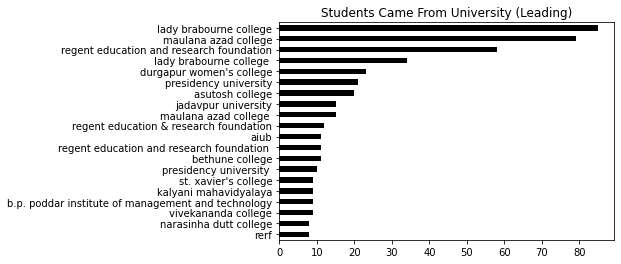

In [17]:
university=free_session_info['collage name'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',color='black',linewidth=2,title='Students Came From University (Leading)')

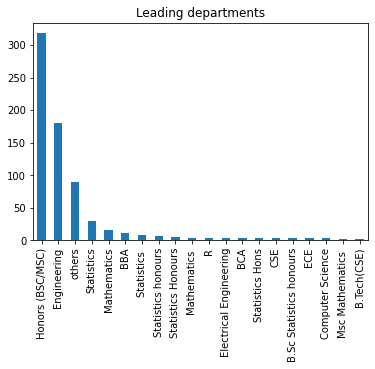

In [18]:
department=free_session_info['Branch'].value_counts()[:20].sort_values(ascending=False).plot(kind='bar',linewidth=2,title='Leading departments')

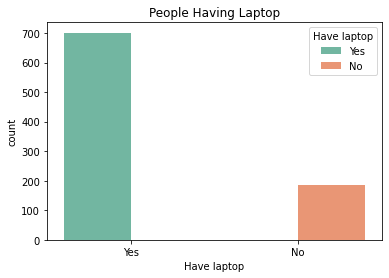

In [19]:
import seaborn as sns
sns.countplot(x="Have laptop",hue='Have laptop', data=free_session_info,palette="Set2")
plt.title('People Having Laptop')
plt.show()


In [20]:
show=free_session_info.loc[(free_session_info['Have laptop']=='No')][['Collage Name','Branch','Country']]

In [21]:
show.head()

,Collage Name,Branch,Country
8,Global Nature Care Sangathan Group Of Institut...,Civil Engineering,India
20,Ramakrishna Mission Shilpapitha,Electronics and telecommunication,India
23,Viswass school & college of nursing,B.sc nursing,India
25,Maulana Azad College,Statistics (H),India
28,Insitiution of engineering and managment,B. Tech (Cse),India


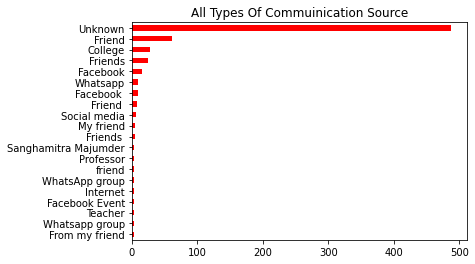

In [22]:
communication_source=free_session_info['Communication source'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh',linewidth=2,color='red',title='All Types Of Commuinication Source')